<a href="https://colab.research.google.com/github/BimsaraS99/support-vector-regression-ml/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

SVR comes under the SVM (support vector machine) which used for classification problems. SMV helps us to find the best hyper plane which maximize the margin between classes. That is why it is also know as the Maximum margin classifier.

## Importing the libraries

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [32]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Regression/Support Vector Regression (SVR)/Python/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [33]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [34]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [64]:
y = y.reshape(len(y),1)

In [36]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
# Feature scaling is often recommended for SVMs, especially when using kernels.
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [66]:
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
mean_value = np.mean(data)
std_deviation = np.std(data)
z_scores = (data - mean_value) / std_deviation

print("Original Data:", data)
print("Z-Scores:", z_scores)
# this cell is not realted to the code, just to explain what happen inside the above cell

Original Data: [ 1  2  3  4  5  6  7  8  9 10]
Z-Scores: [-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


In [38]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [39]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

**C=1.0:**

The C parameter is the regularization parameter, also known as the cost parameter. It controls the trade-off between having a smooth decision boundary and classifying the training points correctly. A smaller C encourages a smoother decision boundary, while a larger C aims to classify all training points correctly. (Regularization)

In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=2) # kernal trick, converting non-linear in to feature space that can be seperate linearly.
regressor.fit(X, y)

# Kernels in SVM allow you to transform the original feature space into a higher-dimensional space, where non-linear relationships can be more effectively captured.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2)

## Predicting a new result

In [62]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
# inverse transform decode the output of the model with the scalling, in to the real value

array([[147488.90654221]])

## Visualising the SVR results

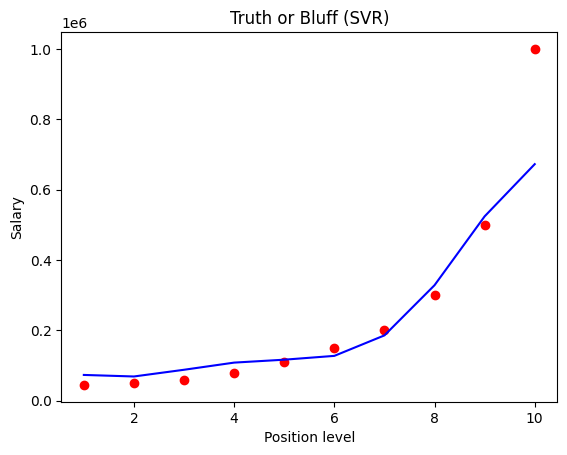

In [61]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

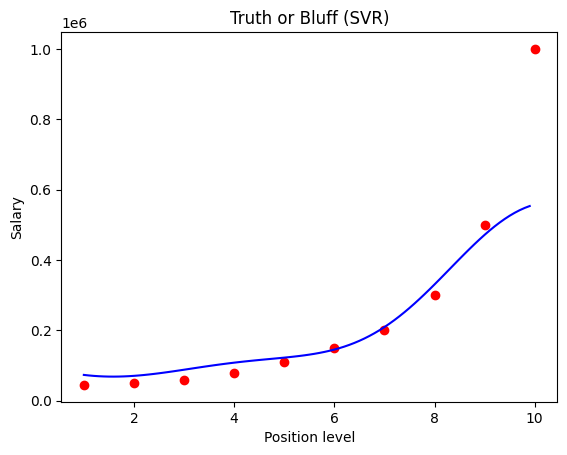

In [43]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()